HEATMAP - see original command line code at https://github.com/TobiasRoeddiger/GazePointHeatMap.

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def draw_display(dispsize, imagefile=None):
    screen = np.zeros((dispsize[1], dispsize[0], 3), dtype='float32')
    if imagefile is not None:
        if not os.path.isfile(imagefile):
            raise Exception(f"ERROR in draw_display: imagefile not found at '{imagefile}'")
        img = mpimg.imread(imagefile)

        if img.ndim == 2:
            img = np.stack((img,)*3, axis=-1)

        w, h = img.shape[1], img.shape[0]
        x = dispsize[0] // 2 - w // 2
        y = dispsize[1] // 2 - h // 2
        screen[y:y + h, x:x + w, :] += img

    dpi = 100.0
    figsize = (dispsize[0] / dpi, dispsize[1] / dpi)
    fig = plt.figure(figsize=figsize, dpi=dpi, frameon=False)
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.axis([0, dispsize[0], 0, dispsize[1]])
    ax.imshow(screen)

    return fig, ax


def gaussian(x, sx, y=None, sy=None):
    if y is None:
        y = x
    if sy is None:
        sy = sx
    xo = x / 2
    yo = y / 2
    M = np.zeros([y, x], dtype=float)
    for i in range(x):
        for j in range(y):
            M[j, i] = np.exp(-1.0 * (((i - xo) ** 2 / (2 * sx * sx)) + ((j - yo) ** 2 / (2 * sy * sy))))
    return M

def draw_heatmap(gazepoints, dispsize, imagefile=None, alpha=0.5, savefilename=None, gaussianwh=200, gaussiansd=None):
    fig, ax = draw_display(dispsize, imagefile=imagefile)

    gwh = gaussianwh
    gsdwh = gwh / 6 if (gaussiansd is None) else gaussiansd
    gaus = gaussian(gwh, gsdwh)

    strt = gwh // 2
    heatmapsize = dispsize[1] + 2 * strt, dispsize[0] + 2 * strt
    heatmap = np.zeros(heatmapsize, dtype=float)

    for gp in gazepoints:
        x = int(strt + gp[0] - gwh / 2)
        y = int(strt + gp[1] - gwh / 2)
        if (not 0 < x < dispsize[0]) or (not 0 < y < dispsize[1]):
            hadj = [0, gwh]
            vadj = [0, gwh]
            if 0 > x:
                hadj[0] = abs(x)
                x = 0
            elif dispsize[0] < x:
                hadj[1] = gwh - int(x - dispsize[0])
            if 0 > y:
                vadj[0] = abs(y)
                y = 0
            elif dispsize[1] < y:
                vadj[1] = gwh - int(y - dispsize[1])
            try:
                heatmap[y:y + vadj[1], x:x + hadj[1]] += gaus[vadj[0]:vadj[1], hadj[0]:hadj[1]] * gp[2]
            except:
                pass
        else:
            heatmap[y:y + gwh, x:x + gwh] += gaus * gp[2]

    heatmap = heatmap[strt:dispsize[1] + strt, strt:dispsize[0] + strt]
    lowbound = np.mean(heatmap[heatmap > 0])
    heatmap[heatmap < lowbound] = np.NaN
    ax.imshow(heatmap, cmap='jet', alpha=alpha)

    ax.invert_yaxis()
    if savefilename is not None:
        fig.savefig(savefilename, bbox_inches='tight', pad_inches=0)

    return fig



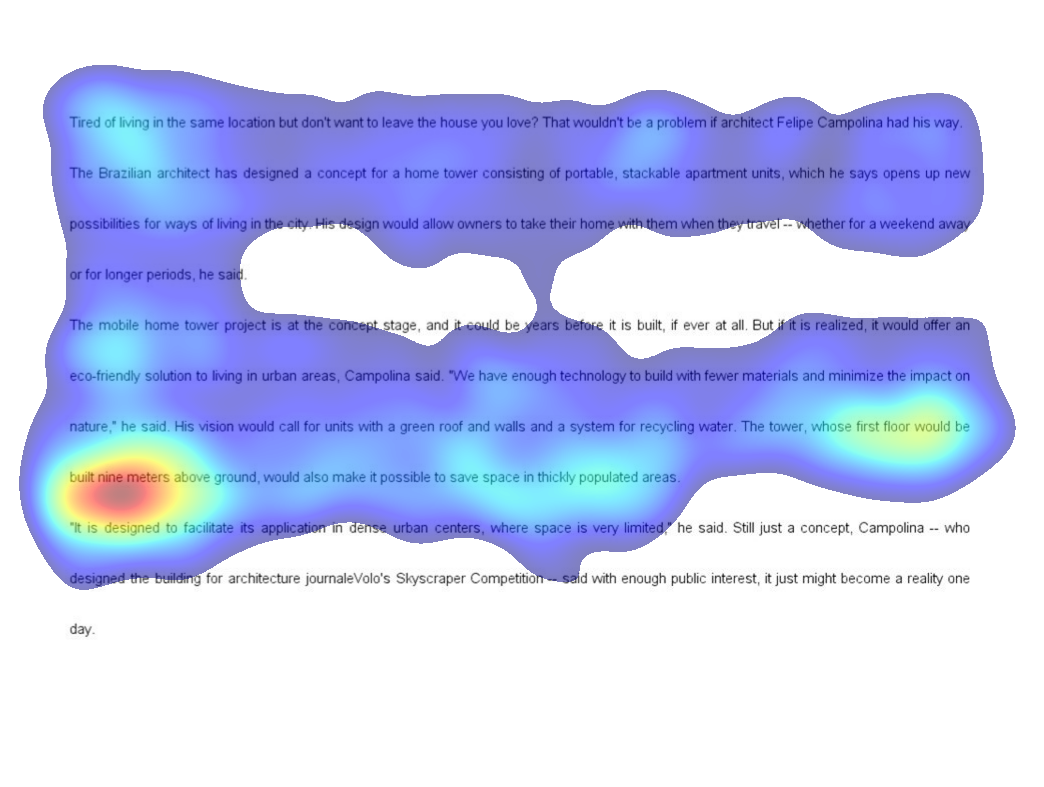

In [2]:

input_path = 'data_Local_group1.csv' 
display_width = 1024
display_height = 768
alpha = 0.5
background_image = '309.png'  
output_name = None
ngaussian = 150
gaussian_sd = None 


gaze_data = []
with open(input_path, newline='') as f:
    reader = csv.reader(f)
    raw = list(reader)

    if len(raw[0]) == 2:
        gaze_data = list(map(lambda q: (float(q[0]), float(q[1]), 1), raw))
    else:
        gaze_data = list(map(lambda q: (float(q[0]), float(q[1]), float(q[2])), raw))


fig = draw_heatmap(
    gaze_data,
    (display_width, display_height),
    imagefile=background_image,
    alpha=alpha,
    savefilename=output_name,
    gaussianwh=ngaussian,
    gaussiansd=gaussian_sd
)

plt.show() 


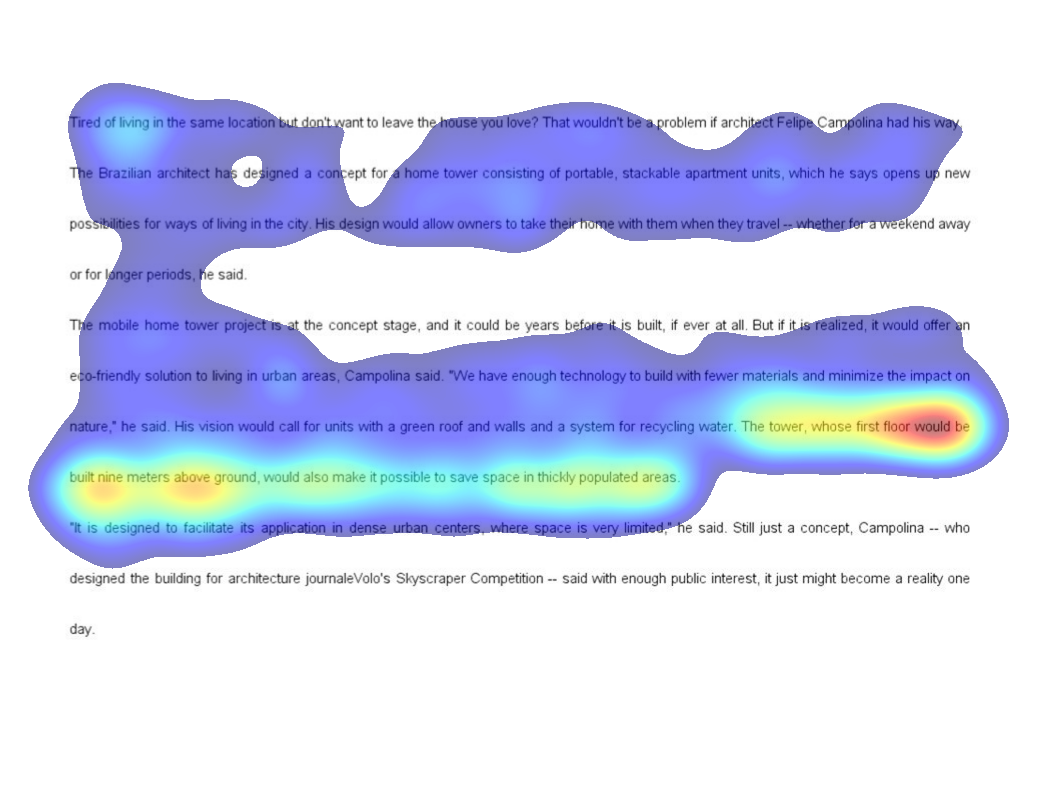

In [3]:

input_path = 'data_Local_group2.csv' 
display_width = 1024
display_height = 768
alpha = 0.5
background_image = '309.png'  
output_name = None
ngaussian = 150
gaussian_sd = None 


gaze_data = []
with open(input_path, newline='') as f:
    reader = csv.reader(f)
    raw = list(reader)

    if len(raw[0]) == 2:
        gaze_data = list(map(lambda q: (float(q[0]), float(q[1]), 1), raw))
    else:
        gaze_data = list(map(lambda q: (float(q[0]), float(q[1]), float(q[2])), raw))


fig = draw_heatmap(
    gaze_data,
    (display_width, display_height),
    imagefile=background_image,
    alpha=alpha,
    savefilename=output_name,
    gaussianwh=ngaussian,
    gaussiansd=gaussian_sd
)

plt.show() 


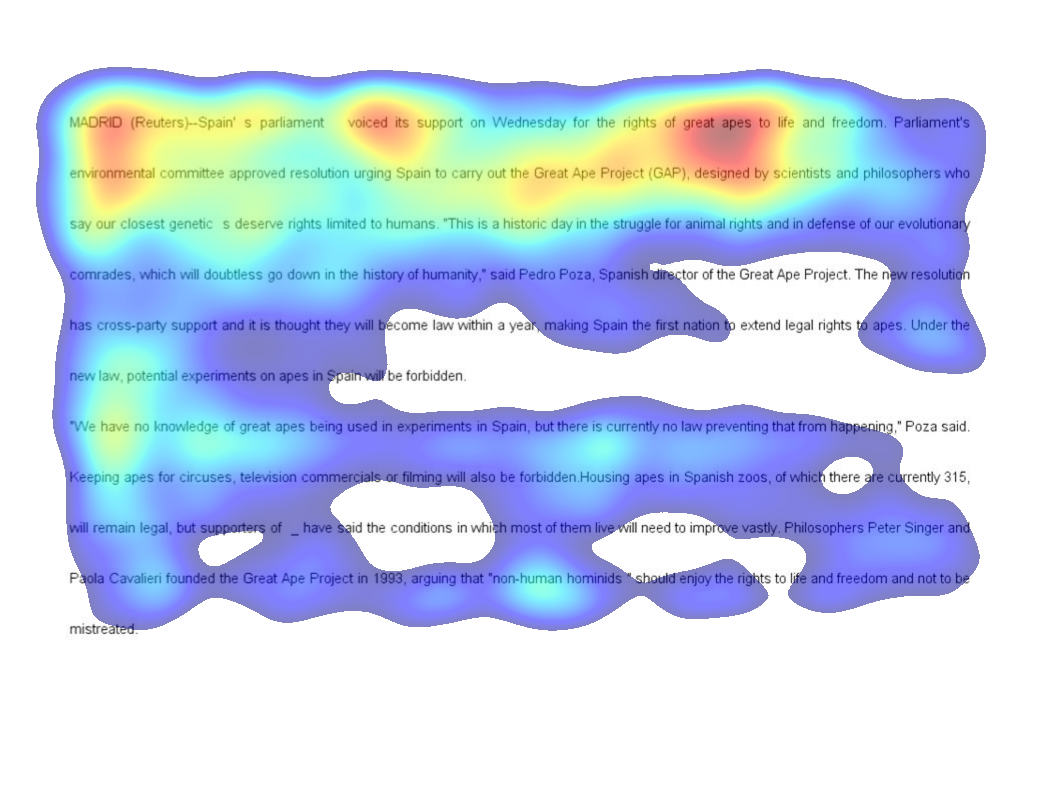

In [4]:

input_path = 'data_Global_group1.csv' 
display_width = 1024
display_height = 768
alpha = 0.5
background_image = '9191.png'  
output_name = None
ngaussian = 150
gaussian_sd = None 


gaze_data = []
with open(input_path, newline='') as f:
    reader = csv.reader(f)
    raw = list(reader)

    if len(raw[0]) == 2:
        gaze_data = list(map(lambda q: (float(q[0]), float(q[1]), 1), raw))
    else:
        gaze_data = list(map(lambda q: (float(q[0]), float(q[1]), float(q[2])), raw))


fig = draw_heatmap(
    gaze_data,
    (display_width, display_height),
    imagefile=background_image,
    alpha=alpha,
    savefilename=output_name,
    gaussianwh=ngaussian,
    gaussiansd=gaussian_sd
)

plt.show() 


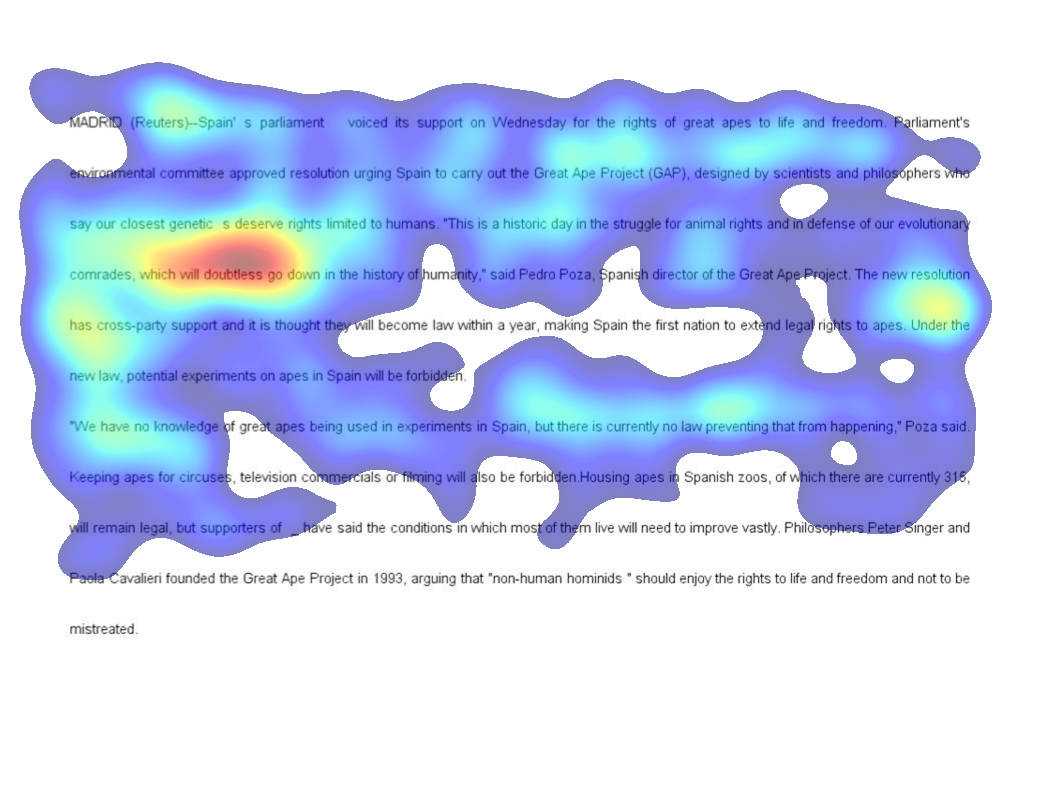

In [5]:

input_path = 'data_Global_group2.csv' 
display_width = 1024
display_height = 768
alpha = 0.5
background_image = '9191.png'  
output_name = None
ngaussian = 150
gaussian_sd = None 


gaze_data = []
with open(input_path, newline='') as f:
    reader = csv.reader(f)
    raw = list(reader)

    if len(raw[0]) == 2:
        gaze_data = list(map(lambda q: (float(q[0]), float(q[1]), 1), raw))
    else:
        gaze_data = list(map(lambda q: (float(q[0]), float(q[1]), float(q[2])), raw))


fig = draw_heatmap(
    gaze_data,
    (display_width, display_height),
    imagefile=background_image,
    alpha=alpha,
    savefilename=output_name,
    gaussianwh=ngaussian,
    gaussiansd=gaussian_sd
)

plt.show() 
